# 11wk: 랜덤포레스트

최규빈  
2023-11-16

# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree
import sklearn.ensemble
#---#
import warnings
warnings.filterwarnings('ignore')
#---#
import matplotlib.animation
import IPython

# 2. Data

In [92]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
np.random.seed(43052)
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)

In [93]:
## step1
X = df_train.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test.loc[:,'employment_score']
## step2 
predictr = sklearn.ensemble.RandomForestRegressor()
## step3
predictr.fit(X,y)
## step4 -- pass
yhat = predictr.predict(X)

In [94]:
random_states = [tree.random_state for tree in predictr.estimators_]
samples = [sklearn.ensemble._forest._generate_sample_indices(r,350,350) for r in random_states]
mytrees = [sklearn.tree.DecisionTreeRegressor(random_state=r,max_features=1.0) for r in random_states]

In [97]:
predictions = [] 
for sample,tree in zip(samples,mytrees):
    tree.fit(np.array(X)[sample],np.array(y)[sample])
    predictions.append(tree.predict(X))

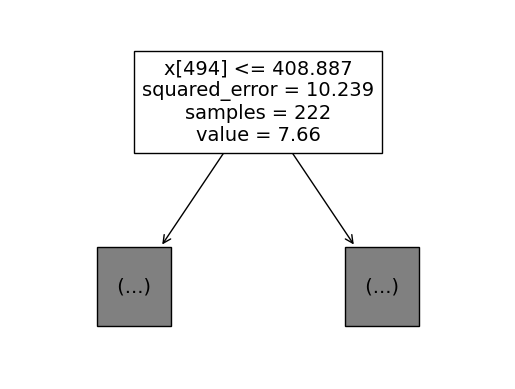

In [103]:
sklearn.tree.plot_tree(predictr.estimators_[-1],max_depth=0)

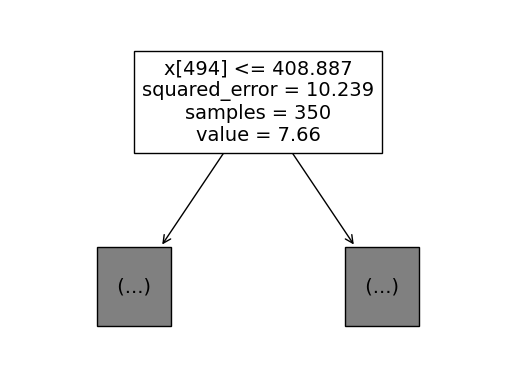

In [104]:
sklearn.tree.plot_tree(mytrees[-1],max_depth=0)

In [106]:
my_yhat = np.stack(predictions).mean(axis=0)

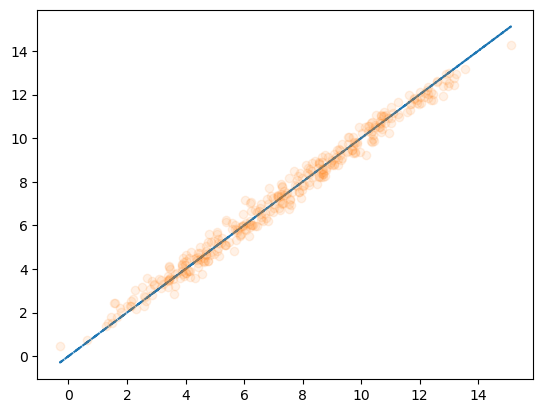

In [111]:
plt.plot(y,y,'--')
plt.plot(y,my_yhat,'o',alpha=0.1)

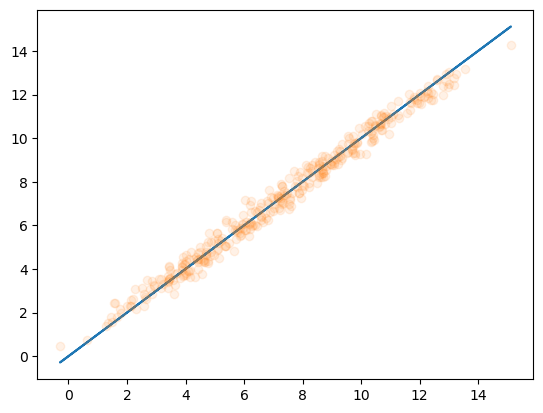

In [113]:
plt.plot(y,y)
plt.plot(y,yhat,'o',alpha=0.1)

In [101]:
index = sklearn.ensemble._forest._generate_sample_indices(1742233889,350,350)

In [99]:
tree = sklearn.tree.DecisionTreeRegressor(
    random_state=1742233889,
    max_features=1.0
)

In [104]:
tree.fit(np.array(X)[index],np.array(y)[index])

In [110]:
len(set(index))

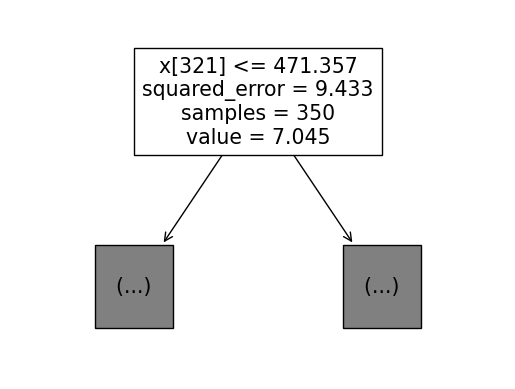

In [106]:
sklearn.tree.plot_tree(tree,max_depth=0)

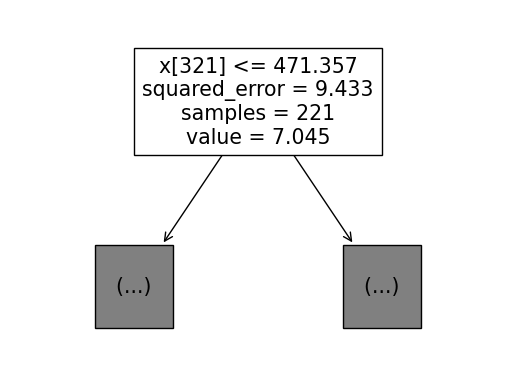

In [108]:
sklearn.tree.plot_tree(predictr.estimators_[0],max_depth=0)

In [95]:
predictr.estimators_

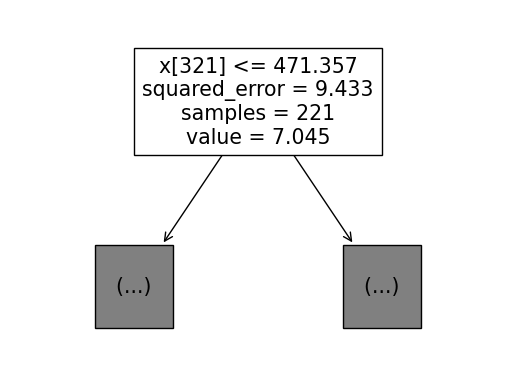

In [63]:
sklearn.tree.plot_tree(predictr.estimators_[0],max_depth=0)